In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

archivos = ['e_detect_A_1','e_detect_A_2','e_detect_A_3','e_detect_A_4','e_detect_B_1','e_detect_B_2','e_detect_B_3','e_detect_B_4']
nombres = ['A1','A2','A3','A4','B1','B2','B3','B4']
titulos = ['Modelo A, sin FWHM\na_0 = 0 keV, a_1=1 keV/canal','Modelo A, con FWHM\na_0 = 0 keV, a_1=1 keV/canal',
           'Modelo A, con FWHM\na_0 = -55 keV, a_1 = 3.2 keV/canal','Modelo A, con FWHM\na_0 = -55 keV, a_1 = 3.2 keV/canal',
           'Modelo B, sin FWHM\na_0 = 0 keV, a_1=1 keV/canal','Modelo B, con FWHM\na_0 = 0 keV, a_1=1 keV/canal',
           'Modelo B, con FWHM\na_0 = -55 keV, a_1 = 3.2 keV/canal','Modelo B, con FWHM\na_0 = -55 keV, a_1 = 3.2 keV/canal']

simulacion = {}

for archivo in archivos:
    file_path = f"{archivo}.txt"
    df = pd.read_csv(file_path, delimiter=' ', header=0, names=['canales', 'energias', 'cuentas'])
    simulacion[archivo] = df

In [24]:
medicion = pd.read_csv('NaI_137Cs_600s.dat', delimiter='\s+', header=0, names=['canales', 'cuentas'])
fondo = pd.read_csv('NaI_Fondo_600s.dat', delimiter='\s+', header=0, names=['canales', 'cuentas'])

#datos de calibración
a_0 = -55.1872 # keV
a_1 = 3.1969 # keV/Canal

medicion['energias'] = [0 if canal < -a_0/a_1 else a_0 + a_1*canal for canal in medicion['canales']]
medicion['cuentas'] = medicion['cuentas'] - fondo['cuentas']

In [40]:
# Normalización a altura compton

# borde compton
E = 662; # keV
e_g = E/511 # Energia de la particula en unidades de masa electronica
Ec = E*2*e_g/(1+2*e_g) # Energia de borde Compton

# Altura compton
rango_compton = medicion[(medicion['energias'] > Ec-100) & (medicion['energias'] < Ec+100)]
hc_med = rango_compton['cuentas'].max()
hc_sim = []
for archivo in archivos:
    rango_compton = simulacion[archivo][(simulacion[archivo]['energias'] > Ec-100) & (simulacion[archivo]['energias'] < Ec+100)]
    hc_sim.append(rango_compton['cuentas'].max())

print(f"Altura compton medición: {hc_med}")
print(f"Altura compton simulación: {hc_sim}")

# Normalización
for archivo in archivos:
    simulacion[archivo]['cuentas norm'] = simulacion[archivo]['cuentas']*hc_med/hc_sim[archivos.index(archivo)]

Altura compton medición: 1257
Altura compton simulación: [2164.0, 2042.0, 8262.0, 6378.0, 1166.0, 1105.0, 4494.0, 3408.0]


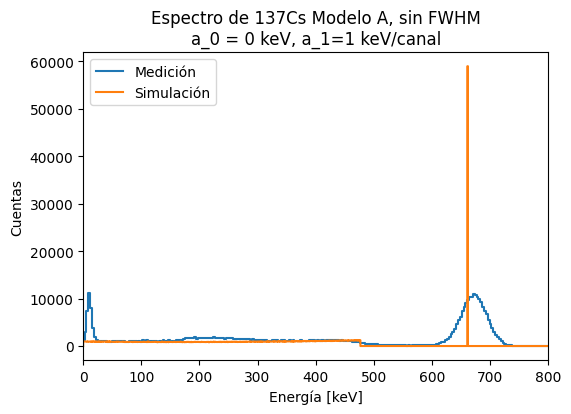

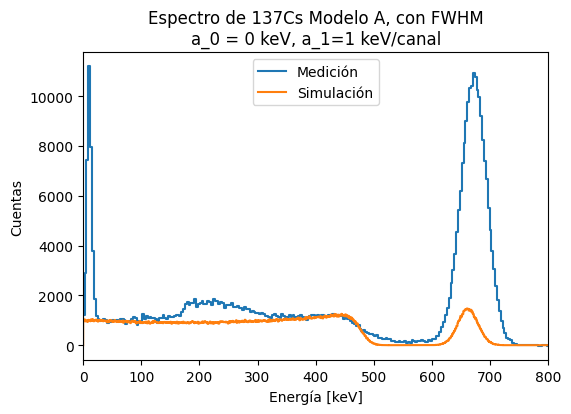

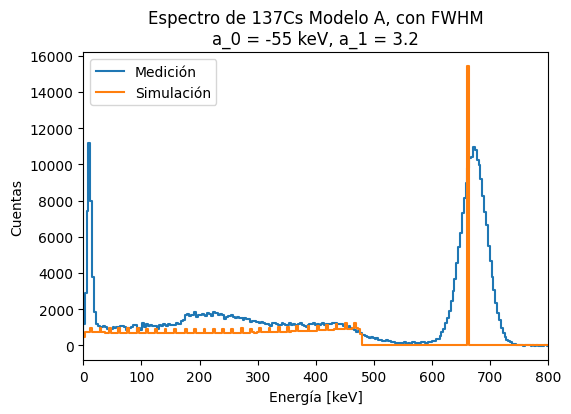

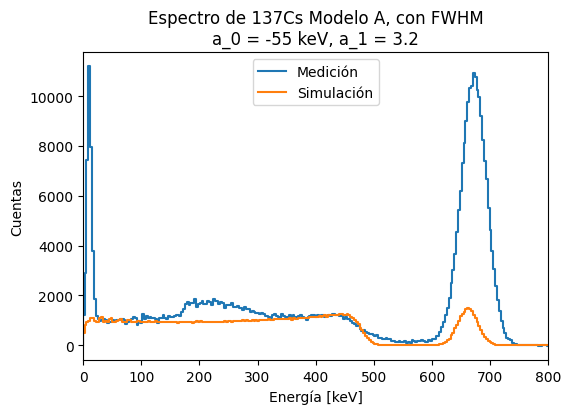

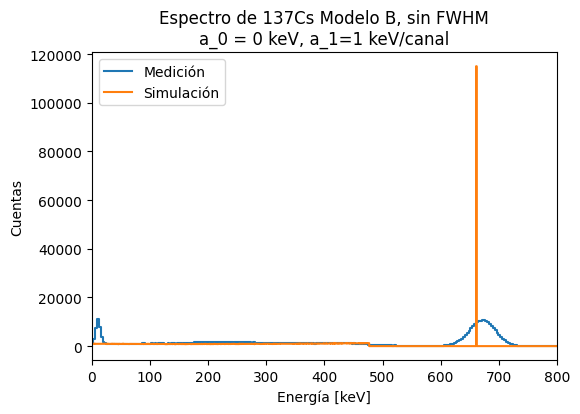

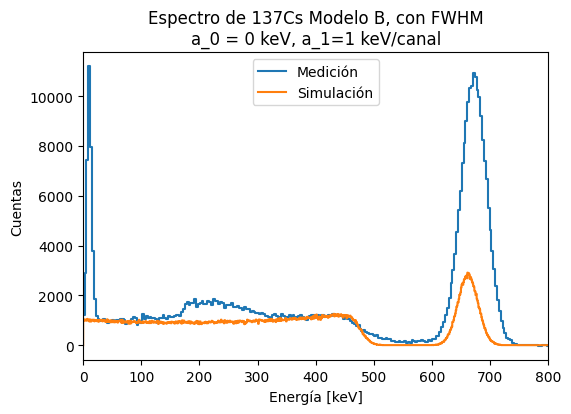

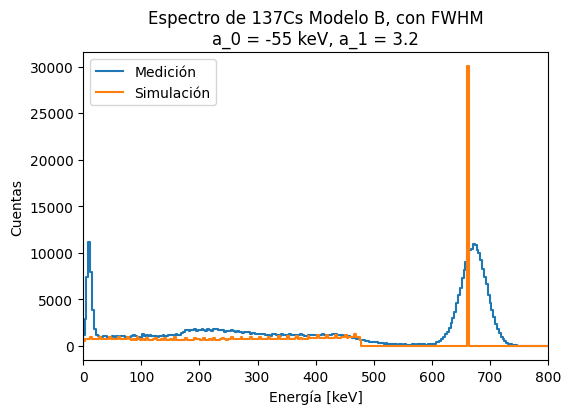

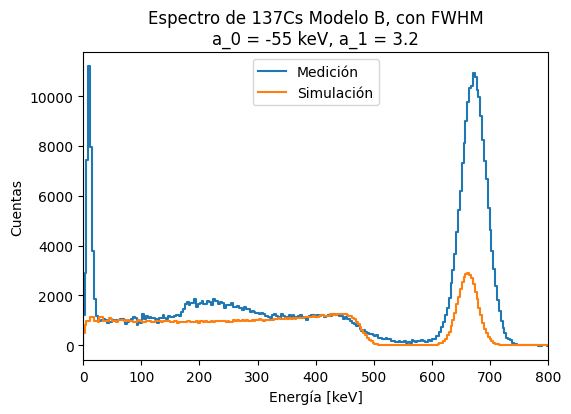

In [46]:
for i in range(len(archivos)):   
    plt.figure(figsize=(6,4))
    plt.step(medicion['energias'], medicion['cuentas'], label='Medición')
    plt.step(simulacion[archivos[i]]['energias'], simulacion[archivos[i]]['cuentas norm'], label='Simulación')
    plt.xlabel('Energía [keV]')
    plt.ylabel('Cuentas')
    plt.title(f'Espectro de 137Cs {titulos[i]}')
    plt.legend()
    plt.xlim(0, 800)
    plt.show()

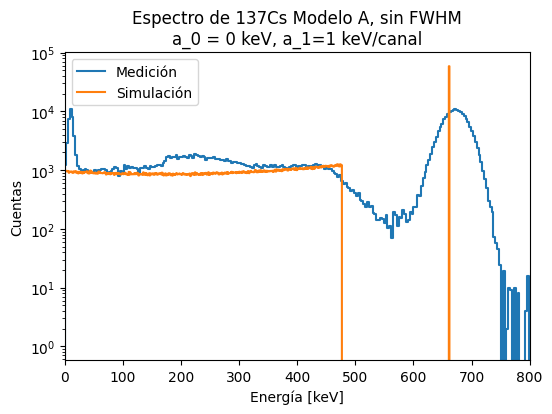

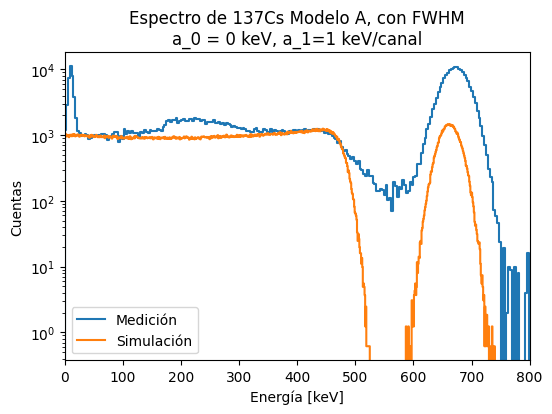

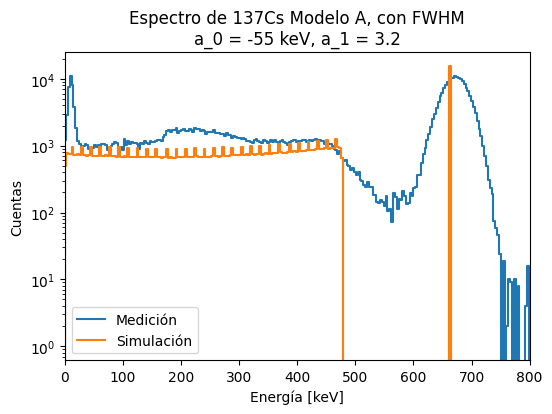

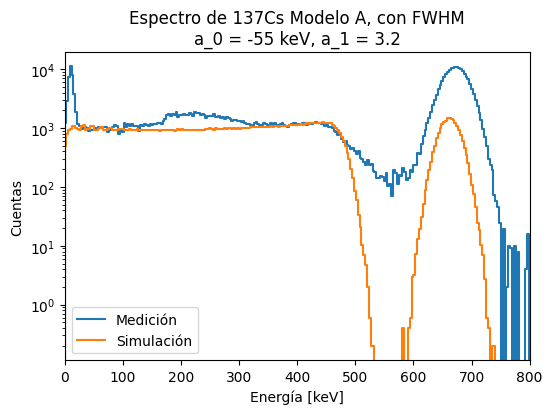

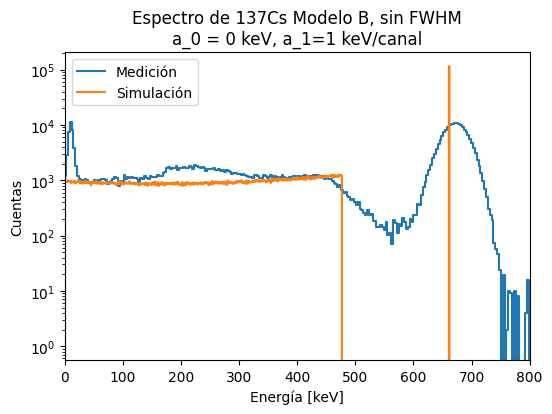

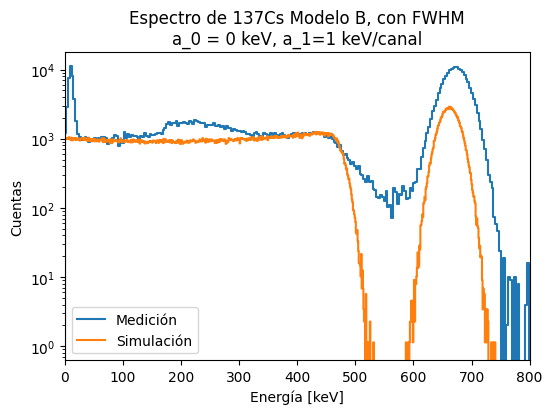

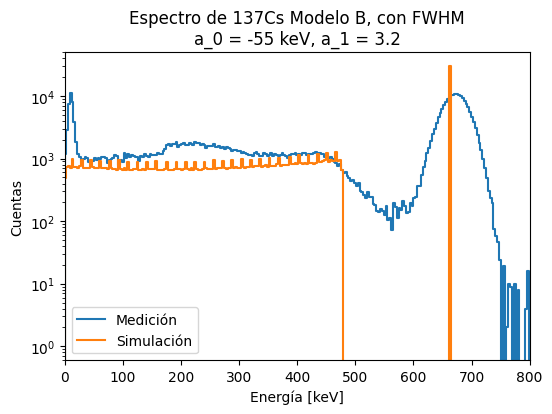

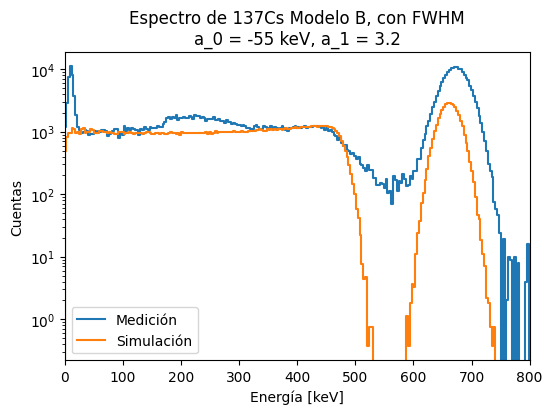

In [47]:
for i in range(len(archivos)):   
    plt.figure(figsize=(6,4))
    plt.step(medicion['energias'], medicion['cuentas'], label='Medición')
    plt.step(simulacion[archivos[i]]['energias'], simulacion[archivos[i]]['cuentas norm'], label='Simulación')
    plt.xlabel('Energía [keV]')
    plt.ylabel('Cuentas')
    plt.title(f'Espectro de 137Cs {titulos[i]}')
    plt.legend()
    plt.xlim(0, 800)
    plt.yscale('log')
    plt.show()